In [3]:
!pip install labelme tensorflow opencv-python matplotlib albumentations

  Using cached labelme-5.3.1.tar.gz (1.5 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl (38.1 MB)
  Using cached albumentations-1.3.1-py3-none-any.whl (125 kB)
  Using cached gdown-4.7.1-py3-none-any.whl (15 kB)
  Using cached imgviz-1.7.4-py3-none-any.whl (7.7 MB)
  Using cached natsort-8.4.0-py3-none-any.whl (38 kB)
     ---------------------------------------- 6.7/6.7 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 22.8/22.8 MB 3.2 MB/s eta 0:00:00
  Using cached h5py-3.9.0-cp310-cp310-win_amd64.whl (2.7 MB)
  Using cached numpy-1.24.3-cp310-cp310-win_amd64.whl (14.8 MB)
  Using cached wrapt-1.15.0-cp310-cp310-win_amd64.whl (36 kB)
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
     ---------------------------------------- 38.0/38.0 MB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 5.7/5.7 MB 5.5 MB/s eta 

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\manav\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 160, in exc_logging_wrapper
    status = run_func(*args)
  File "C:\Users\manav\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 247, in wrapper
    return func(self, options, args)
  File "C:\Users\manav\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 494, in run
    installed = install_given_reqs(
  File "C:\Users\manav\anaconda3\lib\site-packages\pip\_internal\req\__init__.py", line 73, in install_given_reqs
    requirement.install(
  File "C:\Users\manav\anaconda3\lib\site-packages\pip\_internal\req\req_install.py", line 792, in install
    install_wheel(
  File "C:\Users\manav\anaconda3\lib\site-packages\pip\_internal\operations\install\wheel.py", line 729, in install_wheel
    _install_wheel(
  File "C:\Users\manav\anaconda3\lib\site-packages\pip\_internal\operations\install\wheel.py", line 618, in

  Using cached labelme-5.3.1.tar.gz (1.5 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl (38.1 MB)
  Using cached albumentations-1.3.1-py3-none-any.whl (125 kB)
  Using cached gdown-4.7.1-py3-none-any.whl (15 kB)
  Using cached imgviz-1.7.4-py3-none-any.whl (7.7 MB)
  Using cached natsort-8.4.0-py3-none-any.whl (38 kB)
  Using cached onnxruntime-1.15.1-cp310-cp310-win_amd64.whl (6.7 MB)
     ---------------------------------------- 22.8/22.8 MB 2.0 MB/s eta 0:00:00
  Using cached h5py-3.9.0-cp310-cp310-win_amd64.whl (2.7 MB)
  Using cached wrapt-1.15.0-cp310-cp310-win_amd64.whl (36 kB)
  Using cached numpy-1.24.3-cp310-cp310-win_amd64.whl (14.8 MB)
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Using cached qudida-0.0.4-py3-none-any.whl (3.5 kB)
  Using cached opencv_python_headless-4.8.0.76-cp37-abi3-win_amd64.whl (38.0 MB)
  Using cached sympy-1.1

In [4]:
import os
import time
import uuid
import cv2

In [40]:
Images_path=os.path.join("data","images")
number_images=30

In [47]:
cap=cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret,frame=cap.read()
    imgname=os.path.join(Images_path,f'{str(uuid.uuid1())}.png')
    cv2.imwrite(imgname,frame)
    cv2.imshow("frame",frame)
    time.sleep(0.5)
    
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Annotate images with LabelMe

In [134]:
!labelme

[INFO   ] __init__:get_config:70 - Loading config file from: C:\Users\manav\.labelmerc


# Review Dataset and Build Image Loading Function 

In [50]:
import tensorflow as tf
import json
import numpy as np
import matplotlib.pyplot as plt

### Load image into TF Data Pipeline 

In [59]:
images=tf.data.Dataset.list_files('data/images/*.png',shuffle=False)

In [60]:
images.as_numpy_iterator().next()

b'data\\images\\0034a138-4431-11ee-a6b0-f0d415f7d2ed.png'

In [62]:
def load_image(x):
    byte_img=tf.io.read_file(x)
    img=tf.io.decode_png(byte_img)
    return img

In [63]:
images=images.map(load_image)

In [64]:
images.as_numpy_iterator().next()

array([[[224, 255, 255],
        [222, 255, 255],
        [220, 255, 255],
        ...,
        [ 73,  85, 107],
        [ 56,  69, 100],
        [ 27,  40,  72]],

       [[226, 255, 255],
        [223, 255, 255],
        [220, 255, 255],
        ...,
        [123, 136, 163],
        [ 95, 108, 137],
        [ 56,  69,  99]],

       [[227, 255, 255],
        [225, 255, 255],
        [222, 255, 255],
        ...,
        [155, 169, 193],
        [139, 153, 177],
        [136, 150, 174]],

       ...,

       [[151, 122,  72],
        [152, 122,  71],
        [156, 127,  74],
        ...,
        [173, 171, 163],
        [201, 199, 191],
        [192, 190, 181]],

       [[149, 120,  69],
        [149, 120,  70],
        [157, 128,  78],
        ...,
        [196, 195, 186],
        [200, 198, 189],
        [199, 197, 188]],

       [[150, 121,  73],
        [158, 129,  81],
        [161, 131,  83],
        ...,
        [196, 196, 187],
        [197, 198, 188],
        [197, 198, 188]]

In [70]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

## Viewing raw images with matplotlib 

In [71]:
image_generator=images.batch(4).as_numpy_iterator()

In [79]:
plot_images=image_generator.next()

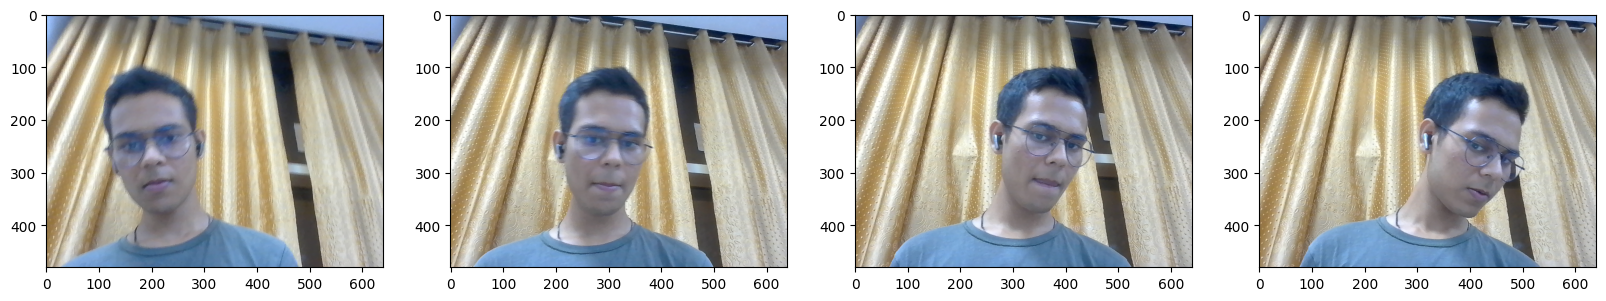

In [81]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(plot_images):
    ax[idx].imshow(img)
plt.show()

# Partiton unaugumented data 

### Manually split data into test, train and val 

### Move the matching labels 

In [82]:
#for train
90*.7

62.99999999999999

In [83]:
#for val
90*.15

13.5

Taking 63 for train, 14 for val and 13 for test

## Moving corresponding labels

In [85]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data',folder,'images')):
        filename=file.split('.')[0]+'.json'
        existing_filepath=os.path.join('data','labels',filename)
        if os.path.exists(existing_filepath):
            new_filepath=os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath,new_filepath)

# Apply image augumentation on images and labels using albumentations 

In [86]:
import albumentations as alb

In [117]:
augumentor=alb.Compose([alb.RandomCrop(width=450,height=450),
                        alb.HorizontalFlip(p=0.5),
                        alb.RandomBrightnessContrast(p=0.2),
                        alb.RandomGamma(p=0.2),
                        alb.RGBShift(p=0.2),
                        alb.VerticalFlip(p=0.5)],
                        bbox_params=alb.BboxParams(format="albumentations",
                          label_fields=['class_labels']))

In [90]:
img=cv2.imread("data/train/images/00e22bfb-4431-11ee-b3c5-f0d415f7d2ed.png")

In [91]:
img.shape

(480, 640, 3)

In [96]:
with open("data/train/labels/00e22bfb-4431-11ee-b3c5-f0d415f7d2ed.json",'r') as f:
    label=json.load(f)

In [103]:
li=label["shapes"][0]['points']

In [104]:
li

[[262.8571428571429, 129.03061224489795],
 [434.795918367347, 383.62244897959187]]

In [110]:
coords=[0,0,0,0]
coords[0],coords[1],coords[2],coords[3]=li[0][0],li[0][1],li[1][0],li[1][1]

In [111]:
coords

[262.8571428571429, 129.03061224489795, 434.795918367347, 383.62244897959187]

In [114]:
coords=list(np.divide(coords,[640,480,640,480]))

In [115]:
coords

[0.41071428571428575,
 0.2688137755102041,
 0.6793686224489797,
 0.7992134353741497]

Now we can pass it into the augumentor

In [118]:
augumented=augumentor(image=img,bboxes=[coords],class_labels=["face"])

In [122]:
augumented

{'image': array([[[163, 166, 171],
         [163, 169, 173],
         [166, 173, 178],
         ...,
         [185, 133,  87],
         [182, 130,  83],
         [182, 130,  83]],
 
        [[159, 164, 169],
         [162, 167, 173],
         [163, 170, 176],
         ...,
         [187, 135,  88],
         [182, 130,  83],
         [183, 131,  85]],
 
        [[158, 164, 169],
         [159, 165, 171],
         [164, 171, 177],
         ...,
         [189, 134,  88],
         [188, 133,  87],
         [192, 138,  92]],
 
        ...,
 
        [[215, 158, 125],
         [215, 158, 125],
         [215, 158, 125],
         ...,
         [202, 167, 140],
         [178, 144, 119],
         [136, 102,  78]],
 
        [[215, 158, 125],
         [215, 158, 125],
         [215, 158, 125],
         ...,
         [188, 147, 122],
         [191, 150, 124],
         [199, 158, 132]],
 
        [[215, 158, 125],
         [215, 158, 125],
         [215, 158, 125],
         ...,
         [188, 148,

In [124]:
cv2.rectangle(augumented['image'],
                        tuple(np.multiply(augumented["bboxes"][0][:2],[450,450]).astype(int)),
                        tuple(np.multiply(augumented["bboxes"][0][2:],[450,450]).astype(int)),
                        (255,0,0),2)

array([[[163, 166, 171],
        [163, 169, 173],
        [166, 173, 178],
        ...,
        [185, 133,  87],
        [182, 130,  83],
        [182, 130,  83]],

       [[159, 164, 169],
        [162, 167, 173],
        [163, 170, 176],
        ...,
        [187, 135,  88],
        [182, 130,  83],
        [183, 131,  85]],

       [[158, 164, 169],
        [159, 165, 171],
        [164, 171, 177],
        ...,
        [189, 134,  88],
        [188, 133,  87],
        [192, 138,  92]],

       ...,

       [[215, 158, 125],
        [215, 158, 125],
        [215, 158, 125],
        ...,
        [202, 167, 140],
        [178, 144, 119],
        [136, 102,  78]],

       [[215, 158, 125],
        [215, 158, 125],
        [215, 158, 125],
        ...,
        [188, 147, 122],
        [191, 150, 124],
        [199, 158, 132]],

       [[215, 158, 125],
        [215, 158, 125],
        [215, 158, 125],
        ...,
        [188, 148, 120],
        [188, 148, 120],
        [188, 148, 120]]

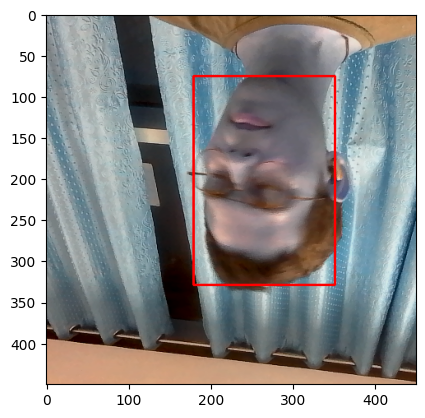

In [125]:
plt.imshow(augumented["image"])

### note that when we want to augument our dataset: first try it on a single element -> this gives you an idea on how to code the loop for the entire dataset 

In [135]:
for partition in['train','test','val']:
    for image in os.listdir(os.path.join('data',partition,'images')):
        img=cv2.imread(os.path.join("data",partition,"images",image))
        
        coords=[0,0,0.00001,0.00001]
        label_path=os.path.join("data",partition,"labels",f"{image.split('.')[0]}.json")
        if os.path.exists(label_path):
            with open(label_path,'r') as f:
                label=json.load(f)
            
            coords[0]=label["shapes"][0]["points"][0][0]
            coords[1]=label["shapes"][0]["points"][0][1]
            coords[2]=label["shapes"][0]["points"][1][0]
            coords[3]=label["shapes"][0]["points"][1][1]
            coords=list(np.divide(coords,[640,480,640,480]))
        try:
            for x in range(60):
                augumented=augumentor(image=img,bboxes=[coords],class_labels=["face"])
                cv2.imwrite(os.path.join("aug_data",partition,"images",f"{image.split('.')[0]}.{x}.png"),augumented["image"])
                
                annotation={}
                annotation['image']=image
                if os.path.exists(label_path):
                    if len(augumented['bboxes'])==0:
                        annotation["bbox"]=[0,0,0,0]
                        annotation['class']=0
                    else:
                        annotation['bbox']=augumented['bboxes'][0]
                        annotation['class']=1
                else:
                    annotation['bbox']=[0,0,0,0]
                    annotation['class']=0
                
                with open(os.path.join("aug_data",partition,'labels',f'{image.split(".")[0]}.{x}.json'),'w') as f:
                    json.dump(annotation,f)
        except Exception as e:
            print(e)
                    
                    

image must be numpy array type


## Loading augumented images to Tensorflow Dataset 

In [137]:
train_images=tf.data.Dataset.list_files('aug_data/train/images/*.png',shuffle=False)
train_images=train_images.map(load_image)
train_images=train_images.map(lambda x:tf.image.resize(x,(120,120)))
train_images=train_images.map(lambda x:x/255)

In [138]:
test_images=tf.data.Dataset.list_files('aug_data/test/images/*.png',shuffle=False)
test_images=test_images.map(load_image)
test_images=test_images.map(lambda x:tf.image.resize(x,(120,120)))
test_images=test_images.map(lambda x:x/255)

In [139]:
val_images=tf.data.Dataset.list_files('aug_data/val/images/*.png',shuffle=False)
val_images=val_images.map(load_image)
val_images=val_images.map(lambda x:tf.image.resize(x,(120,120)))
val_images=val_images.map(lambda x:x/255)

# Prepare Labels 

In [140]:
def load_labels(label_path):
    with open(label_path.numpy(),'r',encoding='utf-8') as f:
        label=json.load(f)
    
    return label['class'],label['bbox']

In [141]:
train_labels=tf.data.Dataset.list_files('aug_data/train/labels/*.json',shuffle=None)

In [143]:
train_labels.as_numpy_iterator().next()

b'aug_data\\train\\labels\\228e539b-4431-11ee-9ddc-f0d415f7d2ed.13.json'

In [144]:
train_labels=tf.data.Dataset.list_files('aug_data/train/labels/*.json',shuffle=None)
train_labels=train_labels.map(lambda x:tf.py_function(load_labels,[x],[tf.uint8,tf.float16]))

In [145]:
test_labels=tf.data.Dataset.list_files('aug_data/test/labels/*.json',shuffle=None)
test_labels=test_labels.map(lambda x:tf.py_function(load_labels,[x],[tf.uint8,tf.float16]))

In [146]:
val_labels=tf.data.Dataset.list_files('aug_data/val/labels/*.json',shuffle=None)
val_labels=val_labels.map(lambda x:tf.py_function(load_labels,[x],[tf.uint8,tf.float16]))

In [148]:
train_labels.as_numpy_iterator().next()

(1, array([0.2817, 0.1791, 0.7817, 0.7744], dtype=float16))

# Combine Label And Image Samples

In [149]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3780, 3780, 300, 300, 840, 840)

In [154]:
train=tf.data.Dataset.zip((train_images,train_labels))
train=train.shuffle(5000)
train=train.batch(8)
tarin=train.prefetch(4)

In [152]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [153]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [156]:
train.as_numpy_iterator().next()[1]

(array([1, 1, 1, 0, 1, 1, 1, 1], dtype=uint8),
 array([[0.4712 , 0.04956, 1.     , 0.8306 ],
        [0.     , 0.2158 , 0.2676 , 0.8335 ],
        [0.3245 , 0.11865, 0.8066 , 0.7197 ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.726  , 0.2133 , 1.     , 0.897  ],
        [0.2003 , 0.1735 , 0.7354 , 0.79   ],
        [0.     , 0.3845 , 0.29   , 1.     ],
        [0.4465 , 0.2324 , 0.9536 , 0.837  ]], dtype=float16))

### View images and annotations 

In [170]:
data_samples=train.as_numpy_iterator()
res=data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


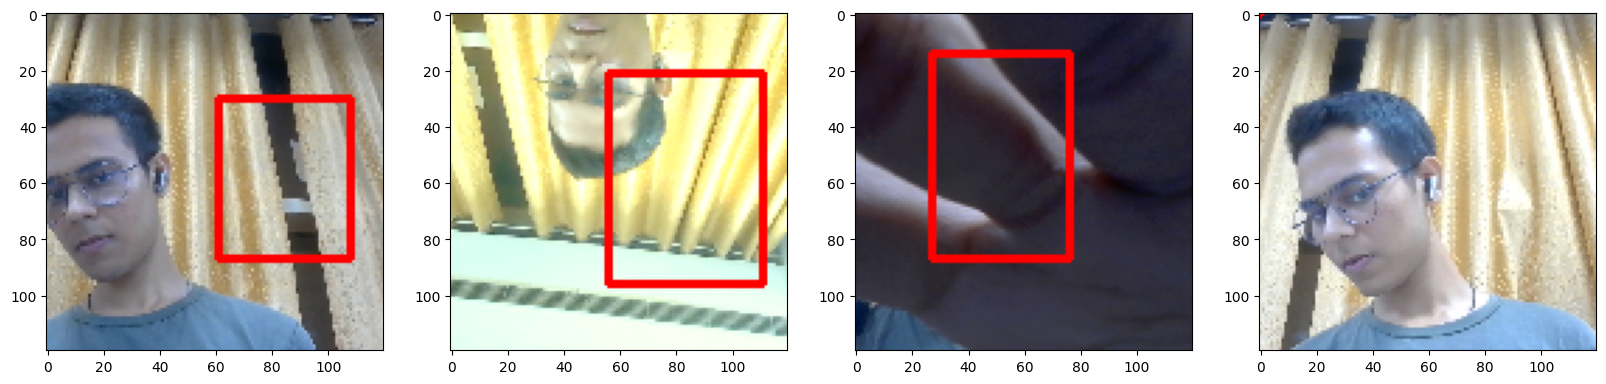

In [171]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx in range(4):
    sample_image=res[0][idx]
    sample_coords=res[1][1][idx]
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)
    ax[idx].imshow(sample_image)

# Build Deep Learning using the Functional API

In [172]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [173]:
vgg = VGG16(include_top=False)

In [174]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [175]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [176]:
facetracker = build_model()

In [177]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [178]:
X, y = train.as_numpy_iterator().next()

In [179]:
X.shape

(8, 120, 120, 3)

In [180]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 1s 1s/step


In [181]:
classes, coords

(array([[0.54890174],
        [0.52130806],
        [0.5876077 ],
        [0.46701357],
        [0.5548037 ],
        [0.42009735],
        [0.5405047 ],
        [0.57272243]], dtype=float32),
 array([[0.5778974 , 0.49125335, 0.3900962 , 0.25868028],
        [0.5819955 , 0.45610702, 0.400954  , 0.32821625],
        [0.5342486 , 0.31157985, 0.29909295, 0.30984142],
        [0.65558785, 0.504282  , 0.43041098, 0.33670208],
        [0.63824475, 0.3334085 , 0.4152154 , 0.35106573],
        [0.39472696, 0.55232257, 0.41361374, 0.22372392],
        [0.60265476, 0.37341133, 0.32314262, 0.343341  ],
        [0.63303864, 0.3806382 , 0.31265938, 0.41948703]], dtype=float32))

# Define Losses and Optimizers

In [182]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [184]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

In [185]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [186]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [187]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=8.300046>

In [188]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.6600529>

In [189]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=8.300046>

# Train Neural Network

In [190]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [191]:
model = FaceTracker(facetracker)

In [192]:
model.compile(opt, classloss, regressloss)

In [193]:
logdir='logs'

In [194]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

# Performance 

In [ ]:
hist.history

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

# Predictions

In [ ]:
test_data = test.as_numpy_iterator()

In [ ]:
test_sample = test_data.next()

In [ ]:
yhat = facetracker.predict(test_sample[0])

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

### Saving the model

In [ ]:
from tensorflow.keras.models import load_model
facetracker.save('facetracker.h5')
facetracker = load_model('facetracker.h5')

# Functionality 

I can now use the model both for detection on any image I provide as well as real time detection via webcam 

In [ ]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()